https://www.kaggle.com/c/titanic/data

https://www.kaggle.com/javiervallejos/titanic-top-3

https://www.kaggle.com/cdeotte/titanic-wcg-xgboost-0-84688

https://www.kaggle.com/gunesevitan/titanic-advanced-feature-engineering-tutorial

## EDA

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, fbeta_score

from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [3]:
inp = pd.read_csv('train.csv', index_col = 'PassengerId')

In [4]:
len(inp)
inp.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
inp.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
inp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
inp.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
print(inp.groupby(['Pclass'])['Survived'].count())
print(inp.groupby(['Pclass'])['Survived'].sum())
print(inp.groupby(['Survived'])['Age'].mean())
print(inp.groupby(['Survived'])['Fare'].mean())

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64
Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64
Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64
Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64


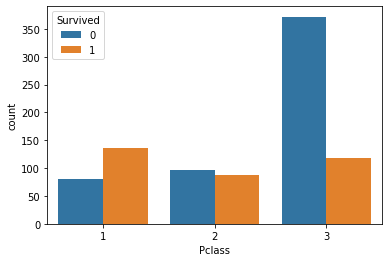

In [9]:
sns.countplot(x='Pclass', hue='Survived', data=inp)

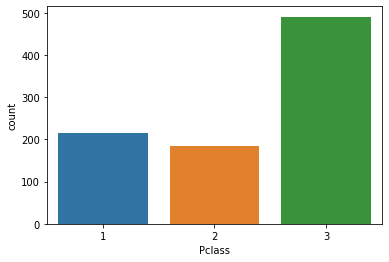

In [10]:
sns.countplot(x='Pclass',data=inp)

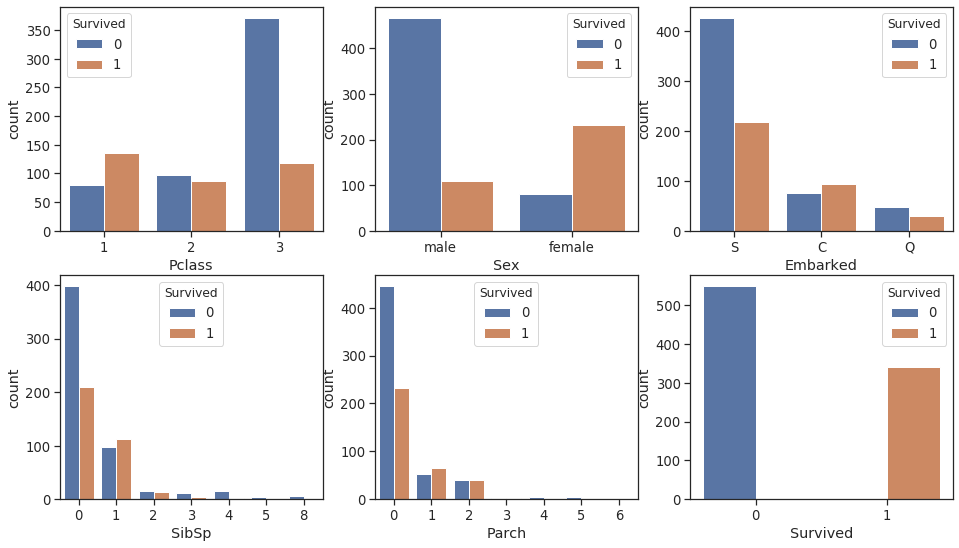

In [11]:
columns = ['Pclass', 'Sex','Embarked','SibSp', 'Parch','Survived']

plt.figure(figsize=(16, 14))
sns.set(font_scale= 1.2)
sns.set_style('ticks')

for i, feature in enumerate(columns):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=inp, x=feature, hue='Survived')

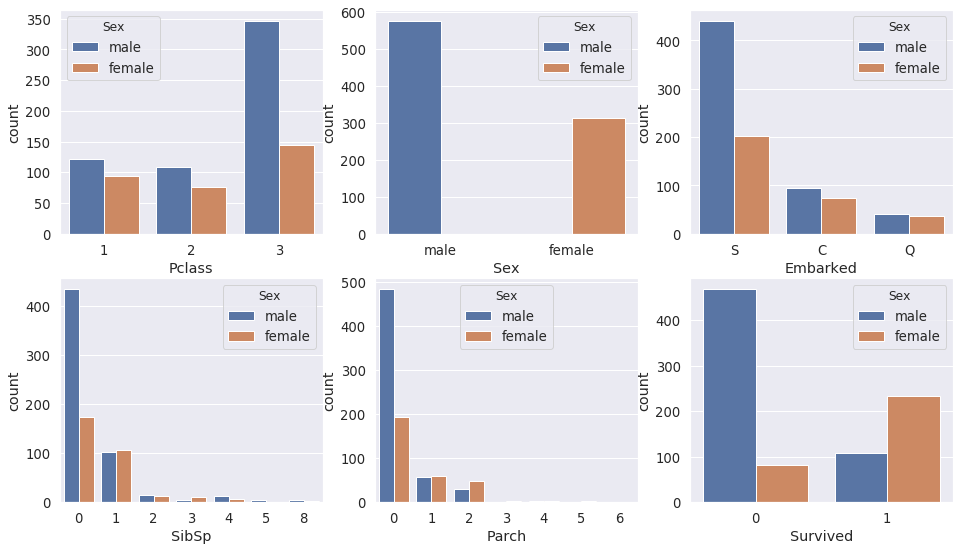

In [12]:
plt.figure(figsize=(16, 14))
sns.set(font_scale= 1.2)
#sns.set_style('ticks')

for i, feature in enumerate(columns):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=inp, x=feature, hue='Sex')

## Build super basic model

Categorical variables

In [13]:
target = inp['Survived']

cat_vars = ['Pclass', 'Sex', 'Embarked']
cat_df = inp[cat_vars]

In [14]:
df = pd.get_dummies(cat_df, columns=cat_vars)

In [15]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 712 samples.
Testing set has 179 samples.


Build a model

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
log = LogisticRegression()

In [18]:
log.fit(X_train, y_train)

/home/shane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
y_pred = log.predict(X_test)

Metrics

In [20]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import accuracy_score, fbeta_score

In [21]:
accuracy_score(y_pred, y_test)

0.7877094972067039

xgboost

In [22]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

[22:47:17] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/shane/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [23]:
y_pred_xgb = xgb.predict(X_test)

In [24]:
accuracy_score(y_pred_xgb, y_test)

0.8212290502793296

DecisionTree

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [27]:
y_pred_tree = tree.predict(X_test)

In [28]:
accuracy_score(y_pred_tree, y_test)

0.8212290502793296

## Make Sex and Embarked into categorical variables

In [29]:
inp['Sex'].unique()

array(['male', 'female'], dtype=object)

In [30]:
sex_map = {'male': 0, 'female': 1}
inp['Sex'] = inp['Sex'].map(sex_map)

In [31]:
inp['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [32]:
inp['Embarked'].isna().sum()

2

In [33]:
emb_map = {'S': 0, 'C': 1, 'Q': 2}
inp['Embarked'] = inp['Embarked'].map(emb_map)

In [34]:
inp.Embarked.fillna(inp.Embarked.median(), inplace=True)

In [35]:
inp['Embarked'].isna().sum()

0

In [38]:
#df['Sex'] = inp['Sex']
#df['Embarked'] = inp['Embarked']

## Make a categorical variable out of Age

Age column has many missing values. Make a correlation plot to see which other variables are correleated with it

In [49]:
np.triu(np.ones_like(corr_df, dtype=np.bool))

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True]])

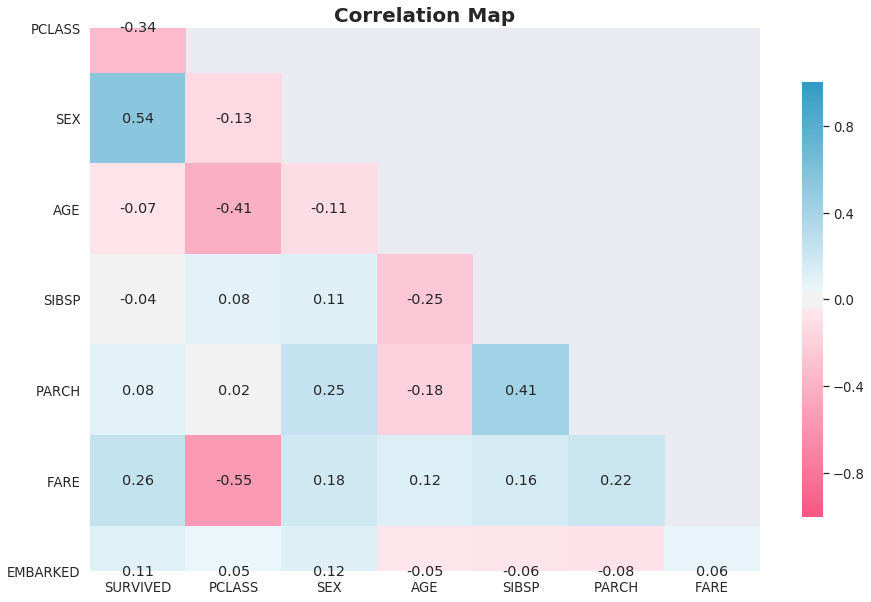

In [66]:
corr_df = inp.corr()
fig, axs = plt.subplots(figsize=(15, 10))

#mask for heatmap
mask = np.triu(np.ones_like(corr_df, dtype=np.bool))

# adjust mask and df
mask = mask[1:, :-1]
corr = corr_df.iloc[1:,:-1].copy()


# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt=".2f", vmin=-1, vmax=1, cbar_kws={"shrink": .8}).set_title("Correlation Map",fontdict= { 'fontsize': 20, 'fontweight':'bold'});

# ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]

plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)


plt.show()

In [36]:
inp.groupby(['Sex', 'Pclass', 'Survived'])['Age'].mean()

Sex  Pclass  Survived
0    1       0           44.581967
             1           36.248000
     2       0           33.369048
             1           16.022000
     3       0           27.255814
             1           22.274211
1    1       0           25.666667
             1           34.939024
     2       0           36.000000
             1           28.080882
     3       0           23.818182
             1           19.329787
Name: Age, dtype: float64

In [37]:
inp.groupby(['Sex', 'Pclass', 'Survived'])['Age'].median()

Sex  Pclass  Survived
0    1       0           45.5
             1           36.0
     2       0           30.5
             1            3.0
     3       0           25.0
             1           25.0
1    1       0           25.0
             1           35.0
     2       0           32.5
             1           28.0
     3       0           22.0
             1           19.0
Name: Age, dtype: float64

In [37]:
#Use the mean, grouped by Sex and Pclass to fill in NaNs
inp['Age'].fillna(inp.groupby(['Sex', 'Pclass'])['Age'].transform('mean'), inplace=True)

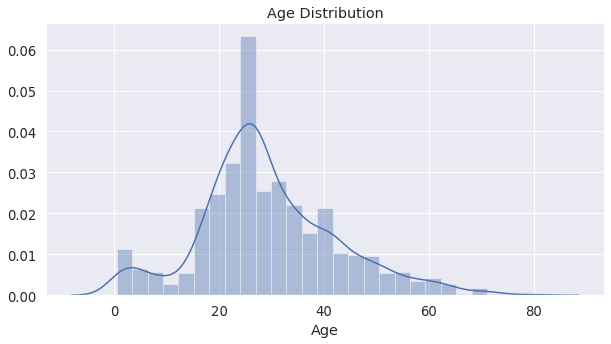

In [38]:
fig, axs = plt.subplots(figsize=(10, 5))
sns.distplot(inp['Age']).set_title("Age Distribution")
sns.despine()

In [41]:
age_bin = pd.cut(inp['Age'], 5)

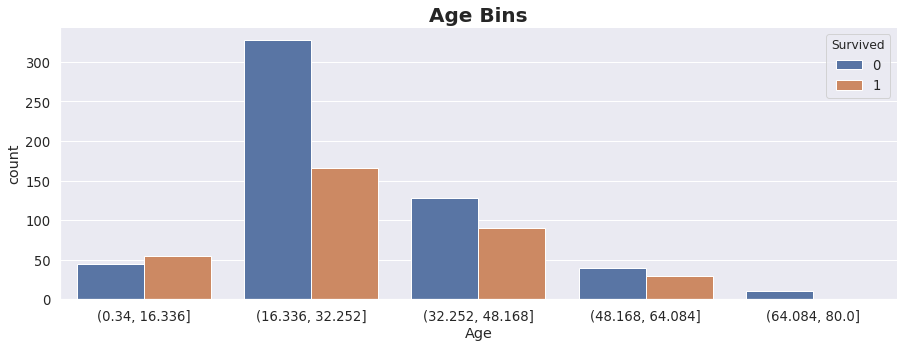

In [42]:
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x=age_bin, hue='Survived', data=inp).set_title("Age Bins",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
sns.despine()

In [43]:
# Convert to categorical
inp['Age'] = LabelEncoder().fit_transform(age_bin)
df['Age'] = LabelEncoder().fit_transform(age_bin) 

In [44]:
pd.crosstab(inp['Age'], inp['Survived'])

Survived,0,1
Age,,
0,45,55
1,327,166
2,128,90
3,39,30
4,10,1


In [45]:
df.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age
PassengerId,,,,,,,,,
1,0,0,1,0,1,0,0,1,1
2,1,0,0,1,0,1,0,0,2
3,0,0,1,1,0,0,0,1,1
4,1,0,0,1,0,0,0,1,2
5,0,0,1,0,1,0,0,1,2


In [52]:
pd.crosstab(inp['Age'], inp['Survived'])

Survived,0,1
Age,,
0,45,55
1,327,166
2,128,90
3,39,30
4,10,1


## Take a look at the fares column

In [46]:
inp.groupby(['Sex', 'Pclass', 'Survived'])['Fare'].mean()

Sex  Pclass  Survived
0    1       0            62.894910
             1            74.637320
     2       0            19.488965
             1            21.095100
     3       0            12.204469
             1            15.579696
1    1       0           110.604167
             1           105.978159
     2       0            18.250000
             1            22.288989
     3       0            19.773093
             1            12.464526
Name: Fare, dtype: float64

In [47]:
inp.groupby(['Sex', 'Pclass', 'Survived'])['Fare'].median()

Sex  Pclass  Survived
0    1       0            42.40000
             1            35.50000
     2       0            13.00000
             1            18.75000
     3       0             7.89580
             1             8.05000
1    1       0           151.55000
             1            82.17080
     2       0            17.00000
             1            23.00000
     3       0            14.47915
             1             9.46875
Name: Fare, dtype: float64

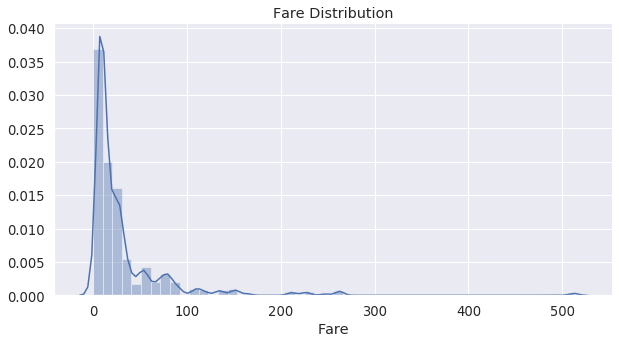

In [48]:
fig, axs = plt.subplots(figsize=(10, 5))
sns.distplot(inp['Fare']).set_title("Fare Distribution")
sns.despine()

In [49]:
fare_bin = pd.cut(inp['Fare'], 5)

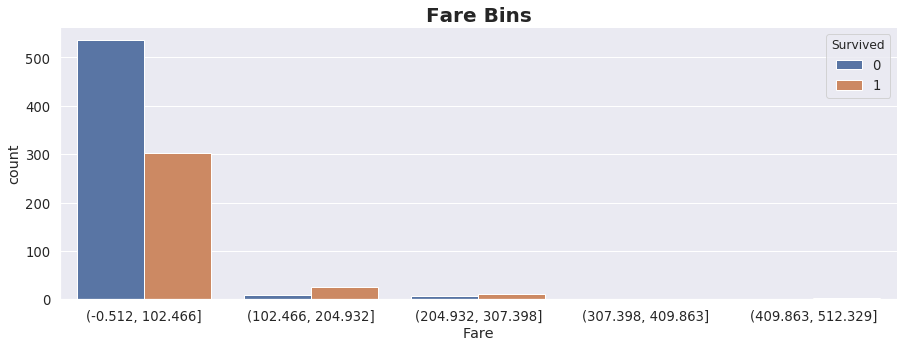

In [50]:
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x=fare_bin, hue='Survived', data=inp).set_title("Fare Bins",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
sns.despine()

In [51]:
# Convert to categorical
inp['Fare'] = LabelEncoder().fit_transform(fare_bin)
df['Fare'] = LabelEncoder().fit_transform(fare_bin) 

## Cabin Column

In [53]:
inp['Cabin'].isna().sum()

687

Mostly null, ignore

## Ticket column

In [26]:
inp['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

????????????????????????

Make a second model

In [66]:
df.drop(['Fare'], axis=1, inplace=True)

In [67]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 712 samples.
Testing set has 179 samples.


In [68]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [69]:
y_pred_tree = tree.predict(X_test)

In [70]:
accuracy_score(y_pred_tree, y_test)

0.8212290502793296

In [71]:
X_test

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age
PassengerId,,,,,,,,,
496,0,0,1,0,1,1,0,0,1
649,0,0,1,0,1,0,0,1,1
279,0,0,1,0,1,0,1,0,0
32,1,0,0,1,0,1,0,0,2
256,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
781,0,0,1,1,0,1,0,0,0
838,0,0,1,0,1,0,0,1,1
216,1,0,0,1,0,1,0,0,1


In [72]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

[22:53:19] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/shane/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [73]:
y_pred_xgb = tree.predict(X_test)

In [74]:
accuracy_score(y_pred_xgb, y_test)

0.8212290502793296